In [1]:
import os
import random
import re
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
class RandomTextGenerator(object):

    def __init__(self, limit=20):
        # Initialize the RandomTextGenerator with a word count limit
        self.limit = limit  # limit of word counts
        self.brain = {"**": {"**": 0}}  # Initialize the dictionary for storing word frequencies
        self.file_flag = True  # Flag to indicate if there was an issue reading the file

    def read_file(self, filename, titles_list):
        # Read titles from a file and append them to a list
        if os.path.isfile(filename):
            with open(filename, "r") as rFile:
                for line in rFile:
                    titles_list.append(line.strip("\n"))
            return False  # File read successfully
        else:
            print("No such file.")
            return True  # File not found

    def train(self, filename):
        # Train the generator using titles from a file and save the generated dictionary to a text file
        titles = []
        if self.read_file(filename, titles):
            self.file_flag = True
            return

        for title in titles:
            words = title.split()  # Split the title into a list of words
            curr_w = words[0]

            # Add start word
            if curr_w in self.brain["**"].keys():
                self.brain["**"][curr_w] += 1
            else:
                self.brain["**"][curr_w] = 1
            self.brain["**"]["**"] += 1

            for i in range(1, len(words)):
                prev_w = words[i - 1]
                curr_w = words[i]

                if prev_w not in self.brain.keys():
                    self.brain[prev_w] = {"**": 1, curr_w: 1}
                else:
                    self.brain[prev_w]["**"] += 1
                    if curr_w in self.brain[prev_w].keys():
                        self.brain[prev_w][curr_w] += 1
                    else:
                        self.brain[prev_w][curr_w] = 1

        self.file_flag = False
        # Save dictionary to a text file
        with open("./Outputs/dictionary.txt", "w") as dict_file:
            dict_file.write(json.dumps(self.brain, indent=4))
        return

    def generate_title(self):
        # Generate a title using the trained dictionary
        if self.file_flag:
            print("Can't generate title due to file reading failure.")
            return

        new_title = ""
        curr_w = ""
        word_count = 1

        # Find starting word first
        prob = random.randint(1, self.brain["**"]["**"])
        counter = 0

        for w in self.brain["**"].keys():
            if w != "**":
                counter += self.brain["**"][w]
                if prob <= counter:
                    curr_w = w
                    new_title += w
                    break

        while curr_w in self.brain.keys() and word_count < self.limit:
            counter = 0
            word_count += 1
            prob = random.randint(1, self.brain[curr_w]["**"])

            for w in self.brain[curr_w].keys():
                if w != "**":
                    counter += self.brain[curr_w][w]
                    if prob <= counter:
                        curr_w = w
                        new_title += " " + w
                        break

        return new_title

    def generate_multiple(self, text_number):
        # Generate multiple titles
        if self.file_flag:
            print("Can't generate title due to file reading failure.")
            return

        return [self.generate_title() for _ in range(text_number)]

    def word_cloud(self, all_words):
        # Generate and display a word cloud
        wordcloud = WordCloud(width=500, height=400, random_state=21, max_font_size=110).generate(all_words)
        plt.figure(figsize=(5, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.show()

In [3]:
filename = "./data/dataset.txt"
rtg = RandomTextGenerator()
rtg.train(filename)
my_texts = rtg.generate_multiple(12)

In [4]:
#word counts plot
all_words = ' '.join(my_texts)

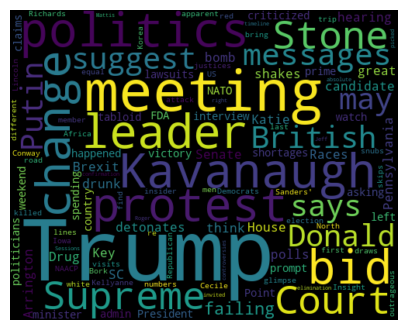

In [5]:
# Word Cloud
rtg.word_cloud(all_words)

In [6]:
for t in my_texts:
    print(t)  # print each title
    print("\n")

with open("./Outputs/generated_titles.txt", "w") as f:
    for title in my_texts:
        f.write(title + "\n")

Trump detonates Brexit bomb in Senate Key Races: Pennsylvania shakes up House hearing with SC candidate Katie Arrington was drunk


Kavanaugh about the polls than you think we're in politics: From the 2018 so great after protest leader's bid for


Drug shortages prompt FDA to change the Supreme Court watch: What happened this weekend. 132 politicians have the President's lawsuits


Trump: 'I have left the Trump claims NATO victory but politics)


Stone's messages suggest he criticized British prime minister after protest leader's bid for British tabloid interview


The Point: Trump says asking about Donald Trump admin spending the country


Kellyanne Conway says Putin meeting 'may be red, white men in failing to bring down Kavanaugh: Bork him find his


2020 Insight: Sanders' road trip; Cecile Richards visits Iowa; NAACP draws Democrats to Donald Trump last, Lincoln first glimpse of


Trump's 43 most outrageous lines from Trump's re-election numbers equal to change the 113 Supreme Cour